In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the input data
# Using forward slashes for better path compatibility
input_df = pd.read_excel('../data/data_to_be_inputed.xlsx')

# Load the attrition report
attrition_df = pd.read_excel('../output_data/20250522_174003 1k+ Run/row_attrition_report_20250522_174003.xlsx')

# Load the final processed contacts (source of "good" phone numbers)
final_processed_df = pd.read_excel('../output_data/20250522_174003 1k+ Run/Final_Processed_Contacts.xlsx')

# Load the failed rows data
failed_rows_df = pd.read_csv('../output_data/20250522_174003 1k+ Run/failed_rows_20250522_174003.csv')

# Load the phone validation output
phone_validation_df = pd.read_excel('../output_data/20250522_174003 1k+ Run/phone_validation_output_20250522_174003.xlsx')

# Display the first few rows of each dataframe to verify loading
print("Input Data:")
display(input_df[1000:1005]) # display() is for IPython/Jupyter environments

print("\nAttrition Report:")
display(attrition_df.head())

print("\nFinal Processed Contacts:")
display(final_processed_df.head())

print("\nFailed Rows:")
display(failed_rows_df.head())

print("\nPhone Validation Output:")
display(phone_validation_df.head())

# --- EDA Plan ---
#
# 1. Understand Input Data:
#    - input_df.info()
#    - input_df.describe(include='all')
#    - Check for missing values: input_df.isnull().sum()
#    - Identify key columns that might contain phone numbers or related info.
#
# 2. Analyze Attrition Report (attrition_df):
#    - attrition_df.info()
# --- Improved Code for Plotting Attrition Reasons ---

# Configuration for the plot
column_to_plot = 'Reason for Attrition'
plot_title_base = 'Attrition Reasons'  # Base title
xlabel_text = 'Number of Occurrences'
ylabel_text = 'Reason for Attrition'  # Or use column_to_plot directly
figure_size = (12, 8)  # Increased figure size (width, height in inches)
top_n_reasons = 15     # Display top N reasons; set to None to display all
bar_color = 'c'        # Cyan color for bars
edge_color = 'black'   # Edge color for bars

# 1. Data Preparation and Error Handling
if column_to_plot not in attrition_df.columns:
    print(f"Error: Column '{column_to_plot}' not found in the DataFrame 'attrition_df'.")
    # In a function, you might raise ValueError here:
    # raise ValueError(f"Column '{column_to_plot}' not found in attrition_df.")
elif attrition_df[column_to_plot].isnull().all():
    print(f"Warning: Column '{column_to_plot}' contains only null values. No plot will be generated.")
else:
    # Calculate value counts and remove any NA groups if they exist
    reason_counts = attrition_df[column_to_plot].value_counts().dropna()

    if reason_counts.empty:
        print(f"No data available in '{column_to_plot}' to plot after processing (e.g., all values were NA or column was empty).")
    else:
        # Handle Top N selection for clarity if there are many categories
        if top_n_reasons is not None and len(reason_counts) > top_n_reasons:
            plot_data = reason_counts.head(top_n_reasons)
            num_other_reasons = len(reason_counts) - top_n_reasons
            current_plot_title = f'Top {top_n_reasons} {plot_title_base}'
            if num_other_reasons > 0:
                 current_plot_title += f' (plus {num_other_reasons} other reasons)' # Simplified for notebook output
        else:
            plot_data = reason_counts
            current_plot_title = f'All {plot_title_base}'

        # 2. Plotting with Enhancements
        plt.figure(figsize=figure_size)
        
        plot_data.plot(kind='barh', color=bar_color, edgecolor=edge_color, width=0.8)

        # 3. Customization for Readability and Maintainability
        plt.title(current_plot_title, fontsize=18, pad=20, fontweight='bold')
        plt.xlabel(xlabel_text, fontsize=14, labelpad=15)
        plt.ylabel(ylabel_text, fontsize=14, labelpad=15)
        
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        # Add data labels to the bars for precise values
        # Adjust x-offset for labels based on max value to prevent overlap
        label_offset = plot_data.max() * 0.01 
        for index, value in enumerate(plot_data):
            plt.text(value + label_offset, index, str(value), va='center', fontsize=11)
            
        # Add a subtle grid for easier value reading
        plt.grid(axis='x', linestyle=':', linewidth=0.6, color='dimgray', alpha=0.7)
        
        # Invert y-axis: value_counts sorts descending, so this puts the largest bar at the top
        plt.gca().invert_yaxis() 
        
        # Ensure all plot elements fit nicely
        plt.tight_layout(pad=1.5) 
        plt.show()
# --- End of Improved Plotting Code ---
# --- Example: Merge input_df with attrition_df to analyze attrition reasons by input characteristics ---

# First, let's verify the column names. Uncomment and run these lines in a new cell if unsure:
# print("Input DF columns:", input_df.columns)
# print("Attrition DF columns:", attrition_df.columns)

# Define potential key columns (MODIFY THESE BASED ON YOUR ACTUAL COLUMN NAMES)
input_key_column = 'Original_Row_ID' # Example: Could be 'Input Row ID', 'id', 'URL', etc.
attrition_key_column = 'Input Row ID' # Example: Often the same as input_key_column or a related ID
reason_column = 'Reason for Attrition' # From your previous plot
input_characteristic_column = 'URL' # Example: Choose a column from input_df you want to analyze, e.g., 'Source', 'Type of Business', etc.

# Ensure the key columns exist in the respective dataframes
if input_key_column not in input_df.columns:
    print(f"Error: Key column '{input_key_column}' not found in input_df. Please check column names.")
elif attrition_key_column not in attrition_df.columns:
    print(f"Error: Key column '{attrition_key_column}' not found in attrition_df. Please check column names.")
elif reason_column not in attrition_df.columns:
    print(f"Error: Reason column '{reason_column}' not found in attrition_df. Please check column names.")
elif input_characteristic_column not in input_df.columns:
    print(f"Error: Input characteristic column '{input_characteristic_column}' not found in input_df. Please check column names.")
else:
    # Perform the merge
    # Using a left merge to keep all rows from attrition_df and add info from input_df
    # If you want to keep all input_df rows and see which ones had attrition, use how='left' and left_on=input_key_column, right_on=attrition_key_column
    merged_df = pd.merge(attrition_df, input_df, left_on=attrition_key_column, right_on=input_key_column, how='left', suffixes=('_attrition', '_input'))

    print("\n--- Merged DataFrame Head ---")
    display(merged_df.head())

    print(f"\n--- Attrition Reasons by '{input_characteristic_column}' (Top 10 examples) ---")
    # Example: Group by an input characteristic and the attrition reason
    # This can become very verbose, so consider focusing on specific reasons or characteristics
    if not merged_df.empty and input_characteristic_column in merged_df.columns and reason_column in merged_df.columns:
        analysis_counts = merged_df.groupby(input_characteristic_column)[reason_column].value_counts().nlargest(10)
        if not analysis_counts.empty:
            display(analysis_counts.to_frame())
        else:
            print(f"No data to display for the grouping of '{input_characteristic_column}' and '{reason_column}'.")
        
        # Further analysis example: What are the top input characteristics for a *specific* attrition reason?
        specific_reason_to_analyze = 'URL validation failed - No content' # Example, pick a common one from your plot
        if specific_reason_to_analyze in merged_df[reason_column].unique():
            print(f"\n--- Top '{input_characteristic_column}' for Attrition Reason: '{specific_reason_to_analyze}' (Top 5) ---")
            top_inputs_for_reason = merged_df[merged_df[reason_column] == specific_reason_to_analyze][input_characteristic_column].value_counts().nlargest(5)
            if not top_inputs_for_reason.empty:
                display(top_inputs_for_reason.to_frame())
            else:
                print(f"No '{input_characteristic_column}' data found for attrition reason '{specific_reason_to_analyze}'.")
        else:
            print(f"Specific reason '{specific_reason_to_analyze}' not found in the merged data's '{reason_column}'.")
    else:
        print("Could not perform grouped analysis. Check if merge was successful and columns exist.")

# --- End of Merge Example ---

# --- Strategies for Merging When No Direct Common Column Exists ---

print("If input_df and attrition_df don't have a direct common column, you need to create one or use indexes carefully.")

# 1. Thoroughly Inspect Your DataFrames
print("\n--- Inspecting input_df (first 5 rows and info) ---")
display(input_df.head())
input_df.info()

print("\n--- Inspecting attrition_df (first 5 rows and info) ---")
display(attrition_df.head())
attrition_df.info()

# Look for columns that might represent the same information (e.g., row numbers, URLs, or combinations of fields).
# Also, consider how 'attrition_df' was generated. It should ideally have a column like 'Input Row ID' or 'Original_Row_ID'.

# 2. Strategy A: Merging on DataFrame Indexes (Use with CAUTION)
print("\n--- Strategy A: Merging on DataFrame Indexes ---")
print("This is only safe if you are CERTAIN that the row order in attrition_df corresponds to input_df, or if both have meaningful indexes that align.")

# Example: If attrition_df's index corresponds to input_df's index
# merged_df_by_index = input_df.merge(attrition_df, left_index=True, right_index=True, suffixes=('_input', '_attrition'))
# print("\nHead of DataFrame merged by index (EXAMPLE ONLY - VERIFY APPLICABILITY):")
# display(merged_df_by_index.head())

# If 'attrition_df' was created from 'input_df' and you reset its index, it might align with 'input_df's default RangeIndex.
# However, if 'input_df' has a non-default index (e.g., from a column set as index), this won't work directly.

# 3. Strategy B: Creating a Common Key
print("\n--- Strategy B: Creating a Common Key ---")

# Option B1: Renaming a column if it's the same data with a different name
# if 'SomeInputColumn' in input_df.columns and 'SomeAttritionColumn' in attrition_df.columns:
#     input_df_temp = input_df.rename(columns={'SomeInputColumn': 'common_key'})
#     attrition_df_temp = attrition_df.rename(columns={'SomeAttritionColumn': 'common_key'})
#     merged_df_renamed_key = pd.merge(input_df_temp, attrition_df_temp, on='common_key', how='left') # or 'inner', 'right'
#     display(merged_df_renamed_key.head())

# Option B2: Creating a compound key if multiple columns together form a unique identifier
print("Example: Creating a compound key from 'URL' and another hypothetical column 'CompanyName'. MODIFY AS NEEDED.")
# Make sure the columns exist and are of string type for concatenation.
# Replace 'URL_input_df' and 'CompanyName_input_df' with actual column names from input_df
# Replace 'URL_attrition_df' and 'CompanyName_attrition_df' with actual column names from attrition_df

# Example column names - YOU MUST VERIFY AND CHANGE THESE
input_col1_for_key = 'URL' # Hypothetical column in input_df
input_col2_for_key = 'Name'  # Hypothetical column in input_df (e.g., a company name or contact name)
attrition_col1_for_key = 'URL' # Hypothetical column in attrition_df
attrition_col2_for_key = 'Original Name' # Hypothetical column in attrition_df

try:
    if input_col1_for_key in input_df.columns and input_col2_for_key in input_df.columns and \
       attrition_col1_for_key in attrition_df.columns and attrition_col2_for_key in attrition_df.columns:
        
        input_df['compound_key'] = input_df[input_col1_for_key].astype(str) + '_' + input_df[input_col2_for_key].astype(str)
        attrition_df['compound_key'] = attrition_df[attrition_col1_for_key].astype(str) + '_' + attrition_df[attrition_col2_for_key].astype(str)
        
        merged_df_compound_key = pd.merge(input_df, attrition_df, on='compound_key', how='left', suffixes=('_input', '_attrition'))
        print("\nHead of DataFrame merged by compound key (EXAMPLE - VERIFY COLUMNS AND LOGIC):")
        display(merged_df_compound_key.head())
        
        # You might want to drop the compound_key columns after merging if they are no longer needed
        # merged_df_compound_key.drop(columns=['compound_key'], inplace=True)
        # input_df.drop(columns=['compound_key'], inplace=True) # Clean up original DFs if temp key added
        # attrition_df.drop(columns=['compound_key'], inplace=True)
    else:
        print("One or more specified columns for compound key not found. Please check your column names.")
        print(f"input_df columns: {input_df.columns}")
        print(f"attrition_df columns: {attrition_df.columns}")
except Exception as e:
    print(f"An error occurred during compound key creation or merge: {e}")

# Option B3: Using an existing column that might be an ID, even if not perfectly named 'Input Row ID'
# For example, if 'attrition_df' has a column like 'Row_Num_From_Source' that corresponds to the original Excel row number.
# You might need to create a similar column in 'input_df' if it's just using a RangeIndex.
# input_df['Original_Row_Num'] = input_df.index + offset # (offset might be needed if Excel is 1-indexed and has headers)

print("\nReview the head() and info() outputs above carefully to identify potential linking columns or strategies.")
print("The most reliable method is usually to have a consistent 'Input Row ID' generated during your data processing pipeline and included in all derived reports like 'attrition_df'.")

# --- End of Strategies for Merging Without Direct Common Column ---

# 3. Analyze Failed Rows (failed_rows_df):
#    - failed_rows_df.info()
#    - failed_rows_df['error_type'].value_counts().plot(kind='barh', title='Failure Types')
#    - plt.show()
#    - failed_rows_df['error_details'].value_counts() # If there's a more specific error message column
#    - Merge with input_df to understand characteristics of rows that failed.
#
# 4. Analyze Phone Validation Output (phone_validation_df):
#    - phone_validation_df.info()
#    - phone_validation_df['is_valid_final'].value_counts() # Or similar column indicating validity
#    - phone_validation_df['validation_stages_summary'].value_counts() # To see where validation fails
#    - Explore relationships between validation results and original extracted numbers/sources.
#
# 5. Analyze Final Processed Contacts (final_processed_df - your "good" numbers):
#    - final_processed_df.info()
#    - How many unique input rows are represented here?
#    - What are the characteristics of the input rows that *did* yield these good numbers?
#    - Compare with input_df to identify patterns in successful extractions.
#
# 6. Correlate and Synthesize:
#    - Create a master DataFrame by merging input_df with attrition_df, failed_rows_df, phone_validation_df (on appropriate keys).
#    - This allows for a holistic view: for each input row, what was its journey? Did it fail? Why? If it succeeded, what did validation say?
#    - Look for patterns in the input data (e.g., specific URL structures, presence/absence of certain keywords in input text) that correlate with high/low success rates or specific failure types.
#
# 7. Address the "1 million row" issue:
#    - While the metrics report shows the system correctly filtered out empty rows via URL validation,
#      for future runs, consider pre-processing the Excel file to only include rows with actual data
#      or adjusting the pipeline's data loading step (e.g., in src/data_handler.py) to stop reading
#      after a certain number of consecutive empty rows.
#
# --- Initial Code Snippets for EDA (to be run in a Jupyter environment or expanded in this script) ---
#
# print("\n--- Input Data Analysis ---")
# print(input_df.info())
# print(input_df.describe(include='all'))
# print("Missing values in input_df:\n", input_df.isnull().sum())
#
# print("\n--- Attrition Analysis ---")
# print(attrition_df.info())
# if 'Reason for Attrition' in attrition_df.columns:
#     print(attrition_df['Reason for Attrition'].value_counts())
# else:
#     print("'Reason for Attrition' column not found in attrition_df. Available columns:", attrition_df.columns)
#
# print("\n--- Failed Rows Analysis ---")
# print(failed_rows_df.info())
# if 'error_type' in failed_rows_df.columns:
#     print(failed_rows_df['error_type'].value_counts())
# elif 'Fault Category' in failed_rows_df.columns: # Based on docs/RowOutcomeReasons_And_FaultCategories.md
#     print("Using 'Fault Category' for error types:")
#     print(failed_rows_df['Fault Category'].value_counts())
# else:
#     print("'error_type' or 'Fault Category' column not found in failed_rows_df. Available columns:", failed_rows_df.columns)
#
# print("\n--- Phone Validation Analysis ---")
# print(phone_validation_df.info())
# # Example: Assuming a column like 'is_valid' or 'status' exists
# # if 'is_valid_final' in phone_validation_df.columns:
# # print(phone_validation_df['is_valid_final'].value_counts())
# # else:
# # print("Relevant validation status column not immediately obvious in phone_validation_df. Explore columns:", phone_validation_df.columns)
#
# print("\n--- Final Processed Contacts Analysis ---")
# print(final_processed_df.info())
# # Example: Assuming an 'Original_Input_Row_ID' or similar to link back
# # if 'Original_Input_Row_ID' in final_processed_df.columns:
# # print(f"Unique input rows yielding good contacts: {final_processed_df['Original_Input_Row_ID'].nunique()}")
# # else:
# # print("Column to link final_processed_df to input_df not immediately obvious. Explore columns:", final_processed_df.columns)
#
# print("\nNotebook setup complete. You can now run this cell in a Jupyter environment for interactive analysis.")

Input Data:


,1,Unternehmen,Beschreibung,Webseite,Telefonnummer
1000,1002,Nursingo,Entwickelt eine App zur Vermittlung von Pflege...,nursingo.de,'+49 30 01234567'
1001,1003,Medflex,Bietet eine Plattform für die digitale Kommuni...,medflex.de,'+49 30 12345098'
1002,1004,Sympathia,Entwickelt Schichtplanungslösungen für Pflegee...,sympathia.de,'+49 30 23450987'
1003,1005,Healthhero,Bietet ein Jobnetzwerk für Pflegekräfte und un...,healthhero.de,'+49 30 34509876'
1004,1006,Smartplan,Entwickelt intelligente Lösungen für die Perso...,smartplan.de,'+49 30 45670987'



Attrition Report:


,InputRowID,CompanyName,GivenURL,Final_Row_Outcome_Reason,Determined_Fault_Category,Relevant_Canonical_URLs,LLM_Error_Detail_Summary,Timestamp_Of_Determination
0,0,Nursingo,nursingo.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.206382
1,2,Sympathia,sympathia.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069
2,3,Healthhero,healthhero.de,ScrapingFailure_InputURL_HTTPError_404,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069
3,4,Smartplan,smartplan.de,ScrapingFailure_InputURL_ConnectionRefused,Website Issue,NaN,NaN,2025-05-23T01:29:22.300649
4,5,Veritas Med,veritas-med.com,Canonical_NoRegexCandidatesFound,Pipeline Logic/Configuration,http://veritas-med.com,NaN,2025-05-23T01:29:22.300649



Final Processed Contacts:


,Company Name,URL,Number,Number Type,Number Found At
0,medflex,https://medflex.de,497531808080,Main Line,https://medflex.de/impressum
1,carehub,https://carehub.de,498003334411,"Hotline, Telefon","https://carehub.de/, https://carehub.de/polici..."
2,time-step,https://time-step.de,4962213299478,Main Line,"https://time-step.de/, https://time-step.de/im..."
3,defa-agentur,https://defa-agentur.de,4968196592660,Main Line,https://defa-agentur.de/de
4,marta,https://marta.de,493062932441,Main Line,"https://marta.de/, https://marta.de/datenschut..."



Failed Rows:


,log_timestamp,input_row_identifier,CompanyName,GivenURL,stage_of_failure,error_reason,error_details
0,2025-05-22T17:42:11.855595,0,Nursingo,nursingo.de,Scraping_DNSError,Scraper returned status: DNSError,"{""pathful_canonical_url"": null, ""true_base_dom..."
1,2025-05-22T17:42:19.071843,2,Sympathia,sympathia.de,Scraping_DNSError,Scraper returned status: DNSError,"{""pathful_canonical_url"": null, ""true_base_dom..."
2,2025-05-22T17:42:21.439914,3,Healthhero,healthhero.de,Scraping_HTTPError_404,Scraper returned status: HTTPError_404,"{""pathful_canonical_url"": null, ""true_base_dom..."
3,2025-05-22T17:42:24.481099,4,Smartplan,smartplan.de,Scraping_ConnectionRefused,Scraper returned status: ConnectionRefused,"{""pathful_canonical_url"": null, ""true_base_dom..."
4,2025-05-22T17:42:32.303052,6,Talents4care,talents4care.de,Scraping_DNSError,Scraper returned status: DNSError,"{""pathful_canonical_url"": null, ""true_base_dom..."



Phone Validation Output:


,CompanyName,GivenURL,GivenPhoneNumber,Original_Number_Status,Top_Number_1,Top_Type_1,Description,ScrapingStatus_Canonical,CanonicalEntryURL,Top_Number_1.1,Top_Type_1.1,Top_Number_2,Top_Type_2,Top_Number_3,Top_Type_3,Top_SourceURL_1,Top_SourceURL_2,Top_SourceURL_3,TargetCountryCodes,RunID
0,Nursingo,nursingo.de,'+49 30 01234567',No Relevant Match Found by LLM,NaN,NaN,Entwickelt eine App zur Vermittlung von Pflege...,Unknown_NoTrueBase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['DE', 'AT', 'CH']",d403d7fe-0dfa-48f8-a6dd-9b24056785f4
1,Medflex,medflex.de,'+49 30 12345098',Corrected,4.975318e+11,Main Line,Bietet eine Plattform für die digitale Kommuni...,Success,https://medflex.de,4.975318e+11,Main Line,NaN,NaN,NaN,NaN,https://medflex.de/impressum,NaN,NaN,"['DE', 'AT', 'CH']",d403d7fe-0dfa-48f8-a6dd-9b24056785f4
2,Sympathia,sympathia.de,'+49 30 23450987',No Relevant Match Found by LLM,NaN,NaN,Entwickelt Schichtplanungslösungen für Pflegee...,Unknown_NoTrueBase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['DE', 'AT', 'CH']",d403d7fe-0dfa-48f8-a6dd-9b24056785f4
3,Healthhero,healthhero.de,'+49 30 34509876',No Relevant Match Found by LLM,NaN,NaN,Bietet ein Jobnetzwerk für Pflegekräfte und un...,Unknown_NoTrueBase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['DE', 'AT', 'CH']",d403d7fe-0dfa-48f8-a6dd-9b24056785f4
4,Smartplan,smartplan.de,'+49 30 45670987',No Relevant Match Found by LLM,NaN,NaN,Entwickelt intelligente Lösungen für die Perso...,Unknown_NoTrueBase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['DE', 'AT', 'CH']",d403d7fe-0dfa-48f8-a6dd-9b24056785f4


Error: Column 'Reason for Attrition' not found in the DataFrame 'attrition_df'.
Error: Key column 'Original_Row_ID' not found in input_df. Please check column names.
If input_df and attrition_df don't have a direct common column, you need to create one or use indexes carefully.

--- Inspecting input_df (first 5 rows and info) ---


,1,Unternehmen,Beschreibung,Webseite,Telefonnummer
0,2,AnNoText,Eine umfassende Kanzleisoftware für Anwälte un...,AnNoText,+49 221 943730
1,3,TriNotar,Marktführende Notariatssoftware zur Abbildung ...,TriNotar,+49 221 943730
2,4,NOAH,Innovative Software-Lösung für Notariate mit F...,NOAH,+49 30 58588122-540
3,5,RA-MICRO Notariat,Unterstützt Notare bei der effizienten und rec...,https://www.ra-micro.de/,+49 30 435980
4,6,LeXtorByte,"Bietet mit ""Digitales Notariat (DiNo)"" eine So...",LeXtorByte,+49 30 12086660


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1              4810 non-null   int64 
 1   Unternehmen    4808 non-null   object
 2   Beschreibung   4808 non-null   object
 3   Webseite       4808 non-null   object
 4   Telefonnummer  4804 non-null   object
dtypes: int64(1), object(4)
memory usage: 188.0+ KB

--- Inspecting attrition_df (first 5 rows and info) ---


,InputRowID,CompanyName,GivenURL,Final_Row_Outcome_Reason,Determined_Fault_Category,Relevant_Canonical_URLs,LLM_Error_Detail_Summary,Timestamp_Of_Determination
0,0,Nursingo,nursingo.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.206382
1,2,Sympathia,sympathia.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069
2,3,Healthhero,healthhero.de,ScrapingFailure_InputURL_HTTPError_404,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069
3,4,Smartplan,smartplan.de,ScrapingFailure_InputURL_ConnectionRefused,Website Issue,NaN,NaN,2025-05-23T01:29:22.300649
4,5,Veritas Med,veritas-med.com,Canonical_NoRegexCandidatesFound,Pipeline Logic/Configuration,http://veritas-med.com,NaN,2025-05-23T01:29:22.300649


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InputRowID                  1154 non-null   int64  
 1   CompanyName                 1153 non-null   object 
 2   GivenURL                    1153 non-null   object 
 3   Final_Row_Outcome_Reason    1154 non-null   object 
 4   Determined_Fault_Category   1154 non-null   object 
 5   Relevant_Canonical_URLs     616 non-null    object 
 6   LLM_Error_Detail_Summary    0 non-null      float64
 7   Timestamp_Of_Determination  1154 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 72.3+ KB

--- Strategy A: Merging on DataFrame Indexes ---
This is only safe if you are CERTAIN that the row order in attrition_df corresponds to input_df, or if both have meaningful indexes that align.

--- Strategy B: Creating a Common Key ---
Example: Creating a comp

In [6]:
input_df.info()
input_df.describe(include='all')
input_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1              4810 non-null   int64 
 1   Unternehmen    4808 non-null   object
 2   Beschreibung   4808 non-null   object
 3   Webseite       4808 non-null   object
 4   Telefonnummer  4804 non-null   object
dtypes: int64(1), object(4)
memory usage: 188.0+ KB


1                0
Unternehmen      2
Beschreibung     2
Webseite         2
Telefonnummer    6
dtype: int64

In [8]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InputRowID                  1154 non-null   int64  
 1   CompanyName                 1153 non-null   object 
 2   GivenURL                    1153 non-null   object 
 3   Final_Row_Outcome_Reason    1154 non-null   object 
 4   Determined_Fault_Category   1154 non-null   object 
 5   Relevant_Canonical_URLs     616 non-null    object 
 6   LLM_Error_Detail_Summary    0 non-null      float64
 7   Timestamp_Of_Determination  1154 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 72.3+ KB


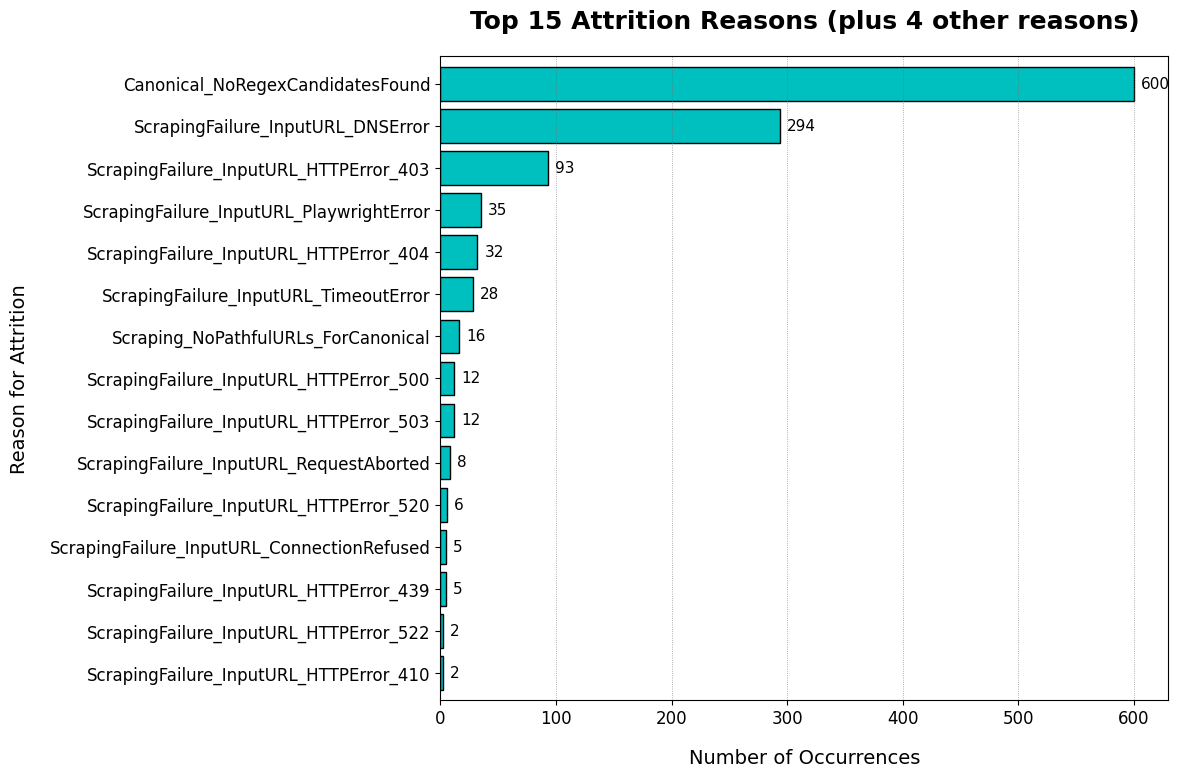

In [ ]:
column_to_plot = 'Final_Row_Outcome_Reason'
plot_title_base = 'Attrition Reasons'  # Base title
xlabel_text = 'Number of Occurrences'
ylabel_text = 'Reason for Attrition'  # Or use column_to_plot directly
figure_size = (12, 8)  # Increased figure size (width, height in inches)
top_n_reasons = 15     # Display top N reasons; set to None to display all
bar_color = 'c'        # Cyan color for bars
edge_color = 'black'   # Edge color for bars

# 1. Data Preparation and Error Handling
if column_to_plot not in attrition_df.columns:
    print(f"Error: Column '{column_to_plot}' not found in the DataFrame 'attrition_df'.")
    # In a function, you might raise ValueError here:
    # raise ValueError(f"Column '{column_to_plot}' not found in attrition_df.")
elif attrition_df[column_to_plot].isnull().all():
    print(f"Warning: Column '{column_to_plot}' contains only null values. No plot will be generated.")
else:
    # Calculate value counts and remove any NA groups if they exist
    reason_counts = attrition_df[column_to_plot].value_counts().dropna()

    if reason_counts.empty:
        print(f"No data available in '{column_to_plot}' to plot after processing (e.g., all values were NA or column was empty).")
    else:
        # Handle Top N selection for clarity if there are many categories
        if top_n_reasons is not None and len(reason_counts) > top_n_reasons:
            plot_data = reason_counts.head(top_n_reasons)
            num_other_reasons = len(reason_counts) - top_n_reasons
            current_plot_title = f'Top {top_n_reasons} {plot_title_base}'
            if num_other_reasons > 0:
                 current_plot_title += f' (plus {num_other_reasons} other reasons)' # Simplified for notebook output
        else:
            plot_data = reason_counts
            current_plot_title = f'All {plot_title_base}'

        # 2. Plotting with Enhancements
        plt.figure(figsize=figure_size)
        
        plot_data.plot(kind='barh', color=bar_color, edgecolor=edge_color, width=0.8)

        # 3. Customization for Readability and Maintainability
        plt.title(current_plot_title, fontsize=18, pad=20, fontweight='bold')
        plt.xlabel(xlabel_text, fontsize=14, labelpad=15)
        plt.ylabel(ylabel_text, fontsize=14, labelpad=15)
        
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        # Add data labels to the bars for precise values
        # Adjust x-offset for labels based on max value to prevent overlap
        label_offset = plot_data.max() * 0.01 
        for index, value in enumerate(plot_data):
            plt.text(value + label_offset, index, str(value), va='center', fontsize=11)
            
        # Add a subtle grid for easier value reading
        plt.grid(axis='x', linestyle=':', linewidth=0.6, color='dimgray', alpha=0.7)
        
        # Invert y-axis: value_counts sorts descending, so this puts the largest bar at the top
        plt.gca().invert_yaxis() 
        
        # Ensure all plot elements fit nicely
        plt.tight_layout(pad=1.5) 
        plt.show()

In [13]:
input_df['ID_adj'] = input_df['1'] -1002

In [14]:
input_key_column = 'ID_adj' # Example: Could be 'Input Row ID', 'id', 'URL', etc.
attrition_key_column = 'InputRowID' # Example: Often the same as input_key_column or a related ID
reason_column = 'Final_Row_Outcome_Reason' # From your previous plot
input_characteristic_column = 'Unternehmen' # Example: Choose a column from input_df you want to analyze, e.g., 'Source', 'Type of Business', etc.

In [15]:
if input_key_column not in input_df.columns:
    print(f"Error: Key column '{input_key_column}' not found in input_df. Please check column names.")
elif attrition_key_column not in attrition_df.columns:
    print(f"Error: Key column '{attrition_key_column}' not found in attrition_df. Please check column names.")
elif reason_column not in attrition_df.columns:
    print(f"Error: Reason column '{reason_column}' not found in attrition_df. Please check column names.")
elif input_characteristic_column not in input_df.columns:
    print(f"Error: Input characteristic column '{input_characteristic_column}' not found in input_df. Please check column names.")
else:
    # Perform the merge
    # Using a left merge to keep all rows from attrition_df and add info from input_df
    # If you want to keep all input_df rows and see which ones had attrition, use how='left' and left_on=input_key_column, right_on=attrition_key_column
    merged_df = pd.merge(attrition_df, input_df, left_on=attrition_key_column, right_on=input_key_column, how='left', suffixes=('_attrition', '_input'))

    print("\n--- Merged DataFrame Head ---")
    display(merged_df.head())

    print(f"\n--- Attrition Reasons by '{input_characteristic_column}' (Top 10 examples) ---")
    # Example: Group by an input characteristic and the attrition reason
    # This can become very verbose, so consider focusing on specific reasons or characteristics
    if not merged_df.empty and input_characteristic_column in merged_df.columns and reason_column in merged_df.columns:
        analysis_counts = merged_df.groupby(input_characteristic_column)[reason_column].value_counts().nlargest(10)
        if not analysis_counts.empty:
            display(analysis_counts.to_frame())
        else:
            print(f"No data to display for the grouping of '{input_characteristic_column}' and '{reason_column}'.")
        
        # Further analysis example: What are the top input characteristics for a *specific* attrition reason?
        specific_reason_to_analyze = 'URL validation failed - No content' # Example, pick a common one from your plot
        if specific_reason_to_analyze in merged_df[reason_column].unique():
            print(f"\n--- Top '{input_characteristic_column}' for Attrition Reason: '{specific_reason_to_analyze}' (Top 5) ---")
            top_inputs_for_reason = merged_df[merged_df[reason_column] == specific_reason_to_analyze][input_characteristic_column].value_counts().nlargest(5)
            if not top_inputs_for_reason.empty:
                display(top_inputs_for_reason.to_frame())
            else:
                print(f"No '{input_characteristic_column}' data found for attrition reason '{specific_reason_to_analyze}'.")
        else:
            print(f"Specific reason '{specific_reason_to_analyze}' not found in the merged data's '{reason_column}'.")
    else:
        print("Could not perform grouped analysis. Check if merge was successful and columns exist.")



--- Merged DataFrame Head ---


,InputRowID,CompanyName,GivenURL,Final_Row_Outcome_Reason,Determined_Fault_Category,Relevant_Canonical_URLs,LLM_Error_Detail_Summary,Timestamp_Of_Determination,1,Unternehmen,Beschreibung,Webseite,Telefonnummer,ID_adj
0,0,Nursingo,nursingo.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.206382,1002.0,Nursingo,Entwickelt eine App zur Vermittlung von Pflege...,nursingo.de,'+49 30 01234567',0.0
1,2,Sympathia,sympathia.de,ScrapingFailure_InputURL_DNSError,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069,1004.0,Sympathia,Entwickelt Schichtplanungslösungen für Pflegee...,sympathia.de,'+49 30 23450987',2.0
2,3,Healthhero,healthhero.de,ScrapingFailure_InputURL_HTTPError_404,Website Issue,NaN,NaN,2025-05-23T01:29:22.285069,1005.0,Healthhero,Bietet ein Jobnetzwerk für Pflegekräfte und un...,healthhero.de,'+49 30 34509876',3.0
3,4,Smartplan,smartplan.de,ScrapingFailure_InputURL_ConnectionRefused,Website Issue,NaN,NaN,2025-05-23T01:29:22.300649,1006.0,Smartplan,Entwickelt intelligente Lösungen für die Perso...,smartplan.de,'+49 30 45670987',4.0
4,5,Veritas Med,veritas-med.com,Canonical_NoRegexCandidatesFound,Pipeline Logic/Configuration,http://veritas-med.com,NaN,2025-05-23T01:29:22.300649,1007.0,Veritas Med,Bietet automatisierte Lösungen für die Vermitt...,veritas-med.com,'+49 30 56709876',5.0



--- Attrition Reasons by 'Unternehmen' (Top 10 examples) ---


,,count
Unternehmen,Final_Row_Outcome_Reason,
SVA System Vertrieb Alexander GmbH,ScrapingFailure_InputURL_RequestAborted,8
Workday GmbH,Canonical_NoRegexCandidatesFound,8
Confiserie Rieder,Canonical_NoRegexCandidatesFound,7
Confiserie Speck,ScrapingFailure_InputURL_DNSError,7
Kenjo GmbH,Canonical_NoRegexCandidatesFound,7
CarePredict,ScrapingFailure_InputURL_HTTPError_403,6
GFOS mbH,Canonical_NoRegexCandidatesFound,6
MindMate,Canonical_NoRegexCandidatesFound,6
Sopra Steria SE,Canonical_NoRegexCandidatesFound,6


Specific reason 'URL validation failed - No content' not found in the merged data's 'Final_Row_Outcome_Reason'.
